### 1. 문제정의(목표)
- 미국의 중심 도시인 보스턴의 1970년대 거주지에 대한 데이터를 바탕으로 주택가격을 예측해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 2. 데이터 수집
- 보스턴 집 값 데이터셋 로드

In [2]:
data = pd.read_csv('data/boston_house.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### feature_names 테이블

| Feature | 설명 |
|--------|-------|
| **CRIM** | 지역별 범죄 발생률 |
| **ZN** | 25,000평방 피트를 초과하는 거주 지역의 비율 |
| **IDUS** | 비 상업 지역 넓이 비율 |
| **CHAS** | 찰스강에 대한 더미 변수 (강 경계=1, 아니면 0) |
| **NOX** | 일산화질소 농도 |
| **RM** | 거주할 수 있는 방 개수 |
| **AGE** | 1940년 이전에 건축된 소유 주택 비율 |
| **DIS** | 5개 주요 고용센터까지의 가중 거리 |
| **RAD** | 고속도로 접근 용이도 |
| **TAX** | 10,000달러 당 재산세율 |
| **PTRATIO** | 지역의 교사와 학생 수 비율 |
| **B** | 지역의 흑인 거주 비율 |
| **LSTAT** | 하위 계층의 비율 |


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 4. 탐색적 데이터 분석

In [4]:
# 특성간 상관계수 출력
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

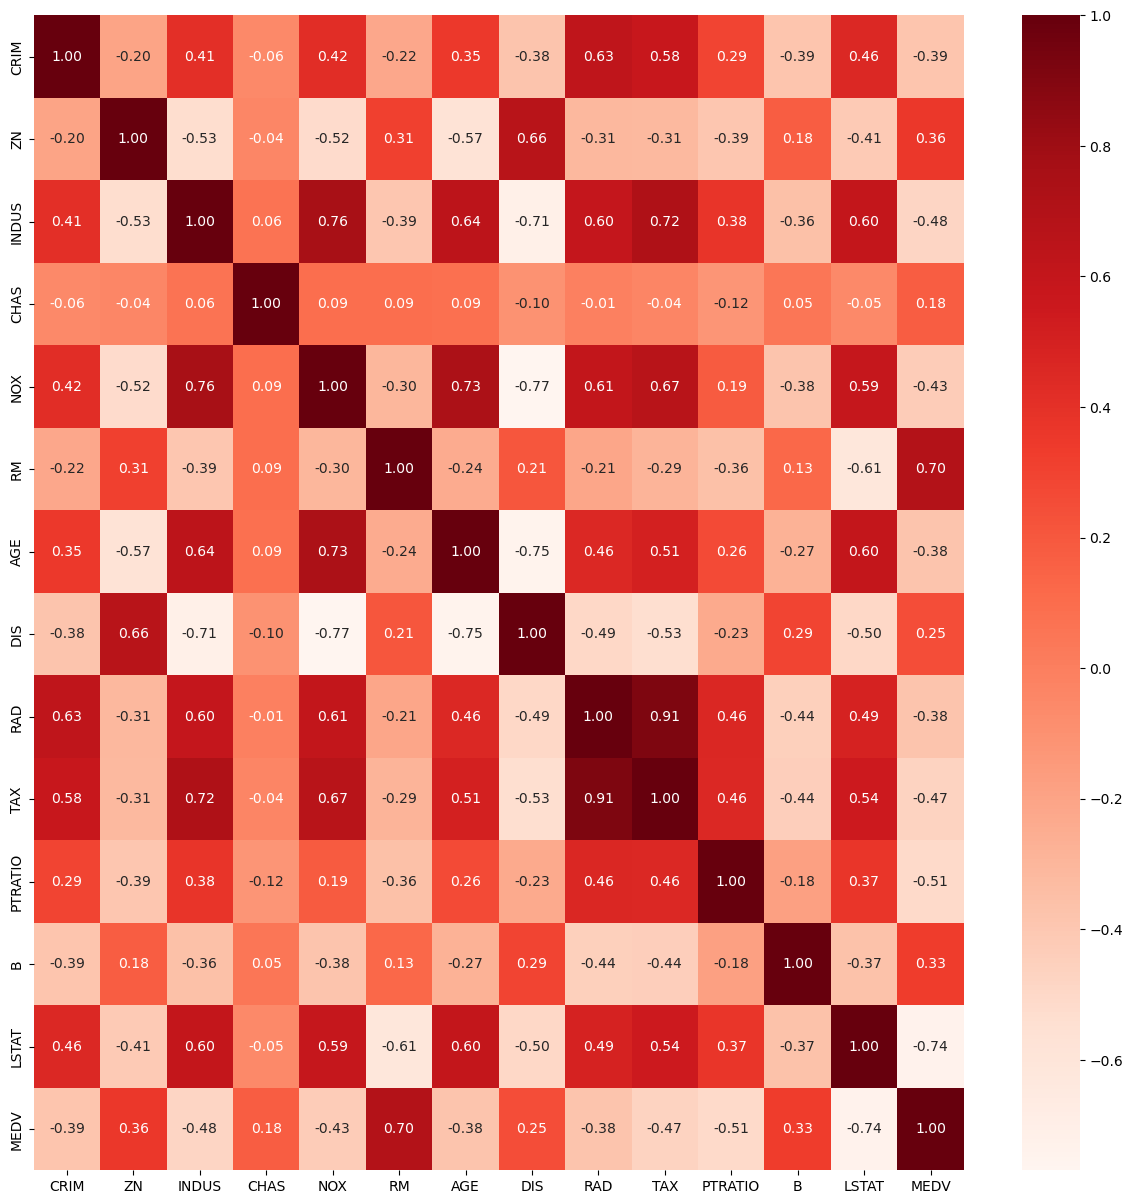

In [7]:
plt.figure(figsize=(15,15))

# 상관계수 히트맵
sns.heatmap(data = data.corr(),
           annot =True,  # annotation : 각 셀의 값을 표시
            fmt = '.2f',
            cmap = 'Reds'
           )

- 상관계수 살펴봤을 때, 주택가격(MEDV)과 상관관계가 높은 특성은 RM(주택당 방 개수), LSTAT(소득하위계층 비율)

### 5. 모델링(모델 선택, 학습, 평가)
- 문제, 정답 데이터 설정
- 학습, 평가 데이터 설정

In [8]:
data.shape

(506, 14)

In [10]:
y = data['MEDV']

In [13]:
X = data.loc[ : , :'LSTAT' ]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### 선형회귀모델 적용

In [16]:
# 선형회귀 모델 임포트
from sklearn.linear_model import LinearRegression

# 회귀 평가지표 MSE
from sklearn.metrics import mean_squared_error

In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# w값 출력(특성의 개수 13개의 가중치 출력)
# y = w1x1 + w2x2 + w3x3 + w4x4 + ... w13x13 + b
linear_model.coef_

array([-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,  7.86055259e-01,
       -1.29365836e+01,  4.03952301e+00, -1.05354914e-02, -1.33498644e+00,
        3.18272501e-01, -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
       -4.62052176e-01])

In [20]:
# 표기법 전환
np.set_printoptions(suppress=True, precision=4)

In [21]:
# w값 출력(특성의 개수 13개의 가중치 출력)
# y = w1x1 + w2x2 + w3x3 + w4x4 + ... w13x13 + b
linear_model.coef_

array([ -0.1545,   0.0414,  -0.0254,   0.7861, -12.9366,   4.0395,
        -0.0105,  -1.335 ,   0.3183,  -0.0126,  -0.9773,   0.0127,
        -0.4621])

In [23]:
# 데이터프레임 생성
coef_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Coefficient' : linear_model.coef_
})
coef_df

,Feature,Coefficient
0,CRIM,-0.154486
1,ZN,0.041395
2,INDUS,-0.025377
3,CHAS,0.786055
4,NOX,-12.936584
5,RM,4.039523
6,AGE,-0.010535
7,DIS,-1.334986
8,RAD,0.318273
9,TAX,-0.012643


- 왜 RM과 LSTAT의 가중치(절대값)이 제일 크지가 않는가?
- 독립변수에 들어가는 수치의 단위가 다르다!(스케일이 다르다)
- ex) NOX 일산화질소 농도의 경우 소수점
- ex) AGE의 경우 숫자가 상대적으로 크다.

In [25]:
# b값 (편향)
linear_model.intercept_

np.float64(31.730351296497542)

MSE, RMSE 확인

In [26]:
# MSE : 오차 제곱의 평균
# 오차 : 예측값 -실제값
# 예측값 : 회귀직선이 예측한 값


In [29]:
pre_train= linear_model.predict(X_train)
pre_test = linear_model.predict(X_test)


In [31]:
pre_test

array([37.39  , 31.5679, 27.1337,  6.5512, 33.6931,  5.5492, 27.1001,
       29.8298, 26.4462, 22.3887, 32.2474, 21.7489, 23.4237, 33.5797,
       28.3145, 15.365 ,  0.1701, 18.7086, 14.6046, 10.8026,  3.1855,
       19.3925, 38.3324, 24.4046, 31.9995, 11.352 , 24.9229, 23.3921,
       22.7507, 21.0958, 16.123 ,  7.5354, 17.598 , 22.8221, 29.2679,
       18.8053, 28.3367,  8.6047, 41.6323, 34.1975, 20.1177,  4.3099,
       29.6111, 11.9215, 27.2222, 30.9454, -6.2647, 19.9637, 21.5938,
       13.6436, 20.4985, 19.9377, 23.6538, 13.5165, 17.6443, 25.2014,
       35.3149, 15.2534, 28.51  , 21.8525, 20.6639, 26.0316, 14.7163,
       32.3465, 20.7126, 12.1691, 19.6099, 25.1948, 21.7899, 21.1727,
       20.5707, 26.6823, 17.6343, 18.5968, 18.8646, 26.1126, 21.8839,
       15.7936, 35.1229, 17.9301, 22.3741, 39.4321, 22.3586, 14.7508,
       25.5997, 17.2634, 18.6474, 10.026 , 19.7358, 17.6831, 36.1822,
       17.6844, 21.0208, 19.0402, 24.8101, 28.1227, 12.3997, 22.7785,
       21.0432, 13.3

In [34]:
train_mse = mean_squared_error(pre_train, y_train)
test_mse = mean_squared_error(pre_test, y_test)

print('train데이터의 MSE :', train_mse)
print('test데이터의 MSE :', test_mse)

print('='*45)

print('train데이터의 RMSE :', train_mse**0.5)
print('test데이터의 RMSE :', test_mse**0.5)

train데이터의 MSE : 19.068341850927222
test데이터의 MSE : 30.697037704088643
train데이터의 RMSE : 4.366731254717563
test데이터의 RMSE : 5.540490745781337


In [36]:
y_train.mean()

np.float64(22.556214689265534)

In [37]:
y_test.mean()

np.float64(22.47828947368421)

### R2 score

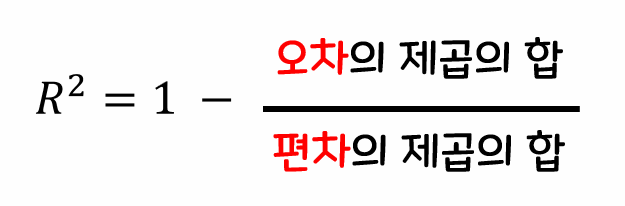

In [38]:
# 회귀모델의 score함수는 R2 score가 출력됨
linear_model.score(X_train, y_train)

0.7611598772034454

In [39]:
linear_model.score(X_test, y_test)

# R2 score
# 0.7 이상 : 괜찮은 모델
# 0.5 이상 : 조정 필요

0.6771696999851686

### 선형회귀 모델 데이터 특성확장
- 선형회귀 모델은 데이터의 분포가 직선의 형태를 벗어나게 되면 정확도 낮아짐
- 또한, 선형회귀 모델은 하이퍼파라미터가 존재하지 않음
- 특성확장을 통해 성능을 높여보자

In [40]:
# copy : 기존의 데이터는 그대로 두면서, 복사하여 새로운 변수명 넣어주기
# 만약, copy없이 새로운 변수에 담아준다면, 내용이 바뀔때, 같이 바뀔수 있다.
extended_X_train = X_train.copy()

In [41]:
# int 불변형
x = 3
y = x
y = 7
x

3

In [46]:
x = [1,2,3]
y = x
y[0] = 999

x

[999, 2, 3]

In [47]:
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,20.2,393.07,7.74
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97


In [65]:
for col1 in X_train.columns:
    for col2 in X_train.columns:
        extended_X_train[col1 + 'x' + col2] = X_train[col1]*X_train[col2] # 169번 추가

In [50]:
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,...,0.0,17.74520,154.88682,2273.304,47.669842,575.52,15970.68,484.396,1032.5788,575.0404
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,...,0.0,14.61208,133.27336,1680.712,41.654112,516.48,14332.32,434.704,2081.6296,463.1104
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,...,0.0,4.11768,52.24500,579.726,25.787358,185.76,5154.84,156.348,3042.3618,59.9076
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,...,0.0,1.93843,34.86769,105.339,41.830646,24.05,1087.06,86.099,1904.4233,23.1361
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,...,0.0,10.99854,98.49924,1674.162,32.885454,72.24,12840.66,363.006,7135.3254,326.1636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,...,0.0,8.73334,91.58772,1195.404,53.117582,359.52,9976.68,302.596,5882.3464,224.4004
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,...,0.0,2.35543,38.72715,209.671,24.614513,26.95,2145.22,81.928,2139.2910,29.0521
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,...,0.0,10.29600,99.79200,506.880,49.255360,105.60,6881.60,337.920,6921.9040,309.7600
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,...,0.0,5.36433,69.39622,575.925,47.773253,43.88,3038.69,204.042,4331.7239,120.3409


In [51]:
# test도 같은 작업
extended_X_test = X_test.copy()

In [53]:
for col1 in X_test.columns:
    for col2 in X_test.columns:
        extended_X_test[col1 + 'x' + col2] = X_test[col1]*X_test[col2] # 169번 추가

In [54]:
# 특성 확장된 train 데이터로 학습
linear_model2 = LinearRegression()
linear_model2.fit(extended_X_train, y_train)

LinearRegression()

In [55]:
linear_model2.score(extended_X_train,y_train)

0.9332471683804466

In [56]:
linear_model2.score(extended_X_test, y_test)

0.8093536759063699

### 라쏘(Lasso) 모델 적용

In [57]:
from sklearn.linear_model import Lasso

In [103]:
lasso_model = Lasso(alpha = 0.1) # default값 1

In [104]:
lasso_model.fit(extended_X_train, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [105]:
# 라쏘는 중요도가 낮은 특성의 w값을 0으로 만들기 때문에
# 0이 아닌 값들의 개수를 합해서 사용된 특성 수를 알 수 있다.

print(f'사용한 특성 수 : {sum(lasso_model.coef_ != 0)}' )
# 182개중 94개 사용, 88개의 가중치는 0이됨

사용한 특성 수 : 126


In [106]:
lasso_model.score(extended_X_train, y_train) # 선형회귀 93

0.9011633785181892

In [102]:
lasso_model.score(extended_X_test, y_test) # 선형회귀 80

0.8478818684034933

- train에서의 r2는 내려갔지만, test에서는 오름
- 선형회귀 모델에 비해, 과대적합이 줄어들고 성능 향상

### 릿지(Ridge) 모델 적용

In [68]:
from sklearn.linear_model import Ridge

In [69]:
ridge_model = Ridge(alpha = 1)

In [70]:
ridge_model.fit(extended_X_train, y_train)

Ridge(alpha=1)

In [71]:
ridge_model.score(extended_X_train, y_train) # 라쏘모델 88

0.9290610763448084

In [72]:
ridge_model.score(extended_X_test, y_test) # 라쏘모델 84

0.8125837987137934

- alpha값이 1일때는 릿지모델에 비해 라쏘모델이 과대적합 해소에는 더 적합하다고 볼 수 있다.

### 하이퍼파라미터 튜닝

- alpha값을 바꿔가며, RMSE를 확인

In [79]:
# lasso 모델
# alpha값에 따른 RMSE값을 빈 리스트에 담아주자

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_train_list = []
lasso_test_list = []

for i in alpha_list:
    # alpha값을 변경하며 lasso모델 불러오기
    lasso_model = Lasso(alpha = i) # 반복문 실행때마다 다른값이 들어가도록
    lasso_model.fit(extended_X_train, y_train)

    # train 예측값 구하기
    lasso_train_pre = lasso_model.predict(extended_X_train)
    # RMSE
    lasso_train_RMSE = mean_squared_error(lasso_train_pre, y_train)**0.5
    # 빈 리스트에 RMSE값 넣기
    lasso_train_list.append(lasso_train_RMSE)

    # test 예측값 구하기
    lasso_test_pre = lasso_model.predict(extended_X_test)
    # RMSE
    lasso_test_RMSE = mean_squared_error(lasso_test_pre, y_test)**0.5
    # 빈 리스트에 RMSE값 넣기
    lasso_test_list.append(lasso_test_RMSE)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.251e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+03, toleranc

In [77]:
lasso_test_list

[4.221458972433135,
 4.243935779449216,
 3.8032211559519475,
 3.911606675270056,
 4.232941390735924,
 5.188098568923207]

In [80]:
# 한글을 쓰기 위한 코드
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

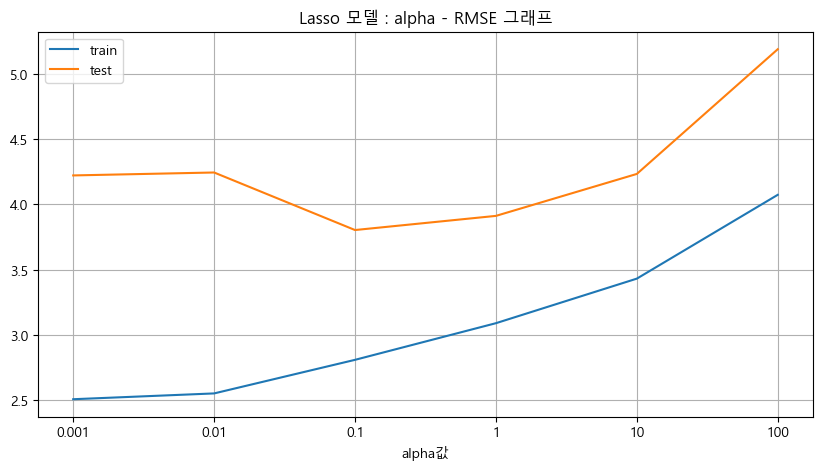

In [82]:
plt.figure(figsize=(10,5))
plt.plot(lasso_train_list, label = 'train') # train 그래프
plt.plot(lasso_test_list, label = 'test')
plt.title('Lasso 모델 : alpha - RMSE 그래프') # 그래프 제목
plt.xlabel('alpha값')
plt.xticks(np.arange(6), alpha_list) # (x축 값 개수, 실제 들어갈 값)
plt.legend()
plt.grid()
plt.show()

- lasso모델에서는 alpha값이 0.1일때, 가장 성능이 좋다

In [ ]:
# ridge 모델
# alpha값에 따른 RMSE값을 빈 리스트에 담아주자

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_train_list = []
ridge_test_list = []

for i in alpha_list:
    # alpha값을 변경하며 ridge모델 불러오기
    ridge_model = ridge(alpha = i) # 반복문 실행때마다 다른값이 들어가도록
    ridge_model.fit(extended_X_train, y_train)

    # train 예측값 구하기
    ridge_train_pre = ridge_model.predict(extended_X_train)
    # RMSE
    ridge_train_RMSE = mean_squared_error(ridge_train_pre, y_train)**0.5
    # 빈 리스트에 RMSE값 넣기
    ridge_train_list.append(ridge_train_RMSE)

    # test 예측값 구하기
    ridge_test_pre = ridge_model.predict(extended_X_test)
    # RMSE
    ridge_test_RMSE = mean_squared_error(ridge_test_pre, y_test)**0.5
    # 빈 리스트에 RMSE값 넣기
    ridge_test_list.append(ridge_test_RMSE)